# Assignment 3

Abdul Azis

PYTN-KS-09-009

---
## Project Overview

Data tersebut terkait dengan kampanye pemasaran langsung dari lembaga perbankan Portugis. Kampanye pemasaran didasarkan pada panggilan telepon. Seringkali, lebih dari satu kontak ke klien yang sama diperlukan, untuk mengakses apakah produk (deposit berjangka bank) akan ('yes') atau tidak ('no') berlangganan.

## Import Library

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder, LabelBinarizer, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## Data Loading

In [2]:
df = pd.read_csv('bank-additional-full.csv', sep=";")

Menampilkan 5 baris pertama

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Menampilkan 5 baris terakhir

In [4]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


Menampilkan ukuran dan baris

In [5]:
df.shape

(41188, 21)

## Data Cleaning

Melihat deskripsi data bertipe numerik

In [6]:
df.describe(include='number')

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Melihat deskripsi data bertipe kategorik

In [7]:
df.describe(exclude='number')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


Mengelompokkan tipe data

In [8]:
# kolom numerik
numeric_cols = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
                'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

# kolom kategori
category_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan',
                 'contact','month', 'day_of_week', 'poutcome', 'y']


In [9]:
print("Fitur numerik:\n {}\n".format(numeric_cols))
print("Fitur kategorik:\n {}".format(category_cols))

Fitur numerik:
 ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

Fitur kategorik:
 ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


Membuat dataframe untuk tipe data numerik

In [10]:
df_numeric = df[numeric_cols]

In [11]:
df_numeric.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0


Membuat dataframe untuk tipe data kategorik

In [12]:
df_category = df[category_cols]

In [13]:
df_category.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no


Memisahkan variabel target dengan fitur

In [14]:
labels = df_category['y']

Memisahkan variabel tipe kategorik dengan label kelas

In [15]:
df_category = df_category.iloc[:, :-1]

Mengecek missing values

In [16]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Tidak terdapat missing values

### Menampilkan outlier menggunakan boxplot

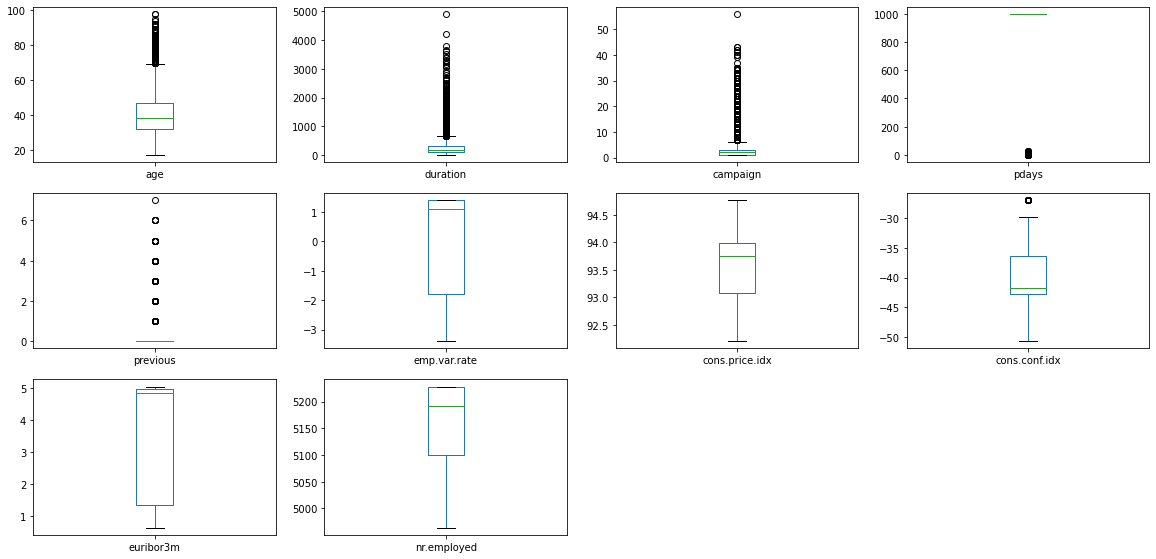

In [17]:
df[numeric_cols].plot(kind='box',subplots=True,layout=(6,4),figsize=(20,20));

Interpretasi : Terdapat missing values pada fitur **age**, **duration**, **campaign**, dan **pdays**, maka outliers akan di atasi menggunakan IQR

Membuat list kolom yang mengandung outlier

In [18]:
outliers_list = ['age','duration', 'campaign', 'pdays', 'previous', 'cons.conf.idx']

Mengatasi missing values dengan IQR

In [19]:
for feature in outliers_list:
    IQR = df[feature].quantile(0.75) - df[feature].quantile(0.25)
    
    lower_bound = df[feature].quantile(0.25) - (1.5*IQR)
    upper_bound = df[feature].quantile(0.75) + (1.5*IQR)
    
    df.loc[(df[feature]<lower_bound ),feature] = lower_bound 
    df.loc[(df[feature]>upper_bound),feature] = upper_bound

Menampilkan kembali boxplot untuk memastikan sudah tidak ada outlier

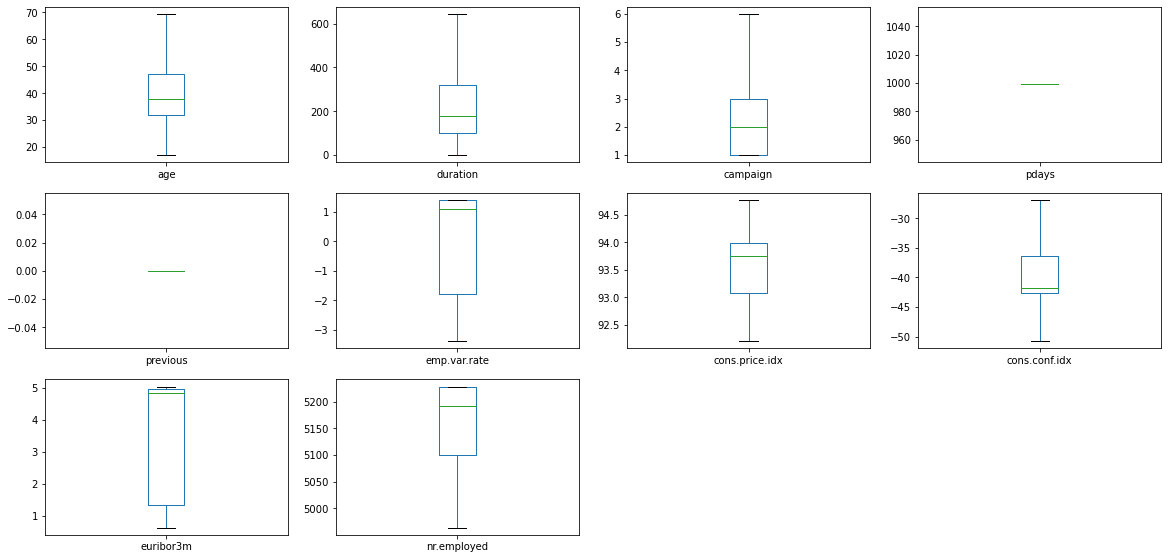

In [20]:
df[numeric_cols].plot(kind='box',subplots=True,layout=(6,4),figsize=(20,20));

## EDA

Melakukan visualisasi data tipe kategorik

In [21]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Melihat jumlah setiap fitur bertipe kategorik 

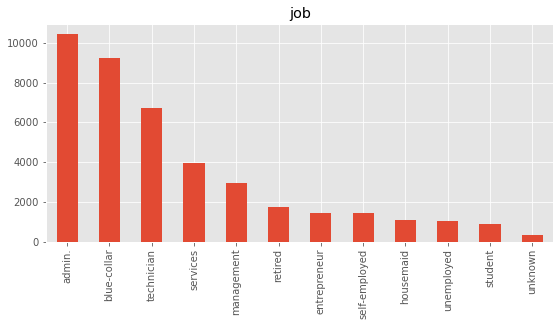

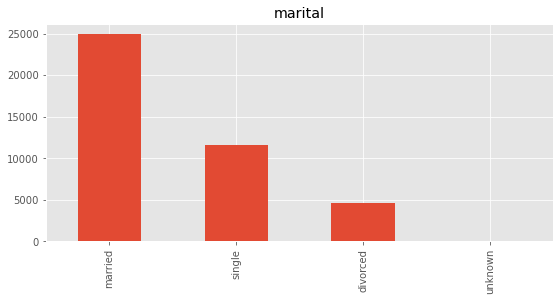

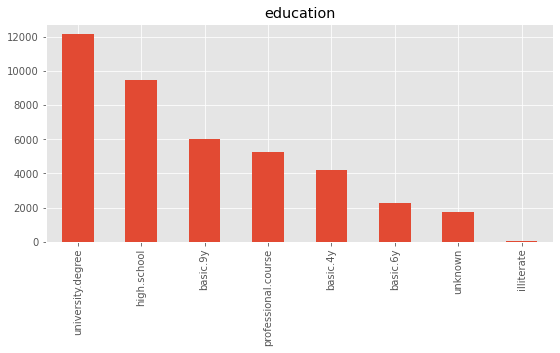

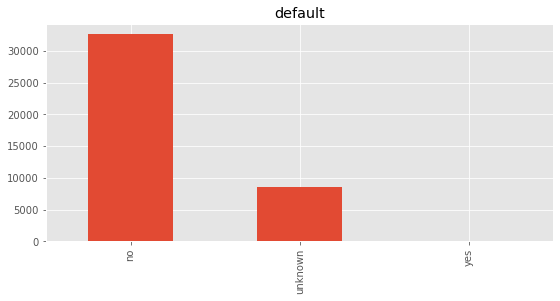

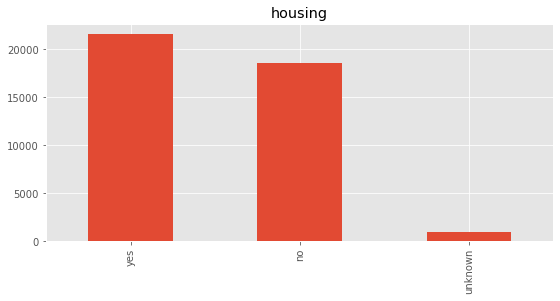

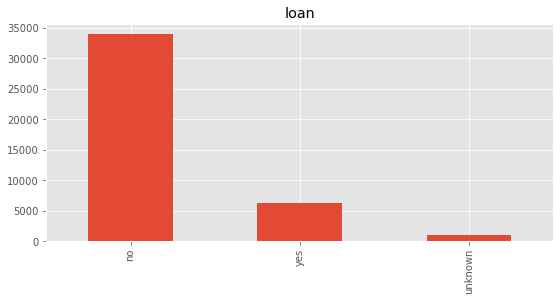

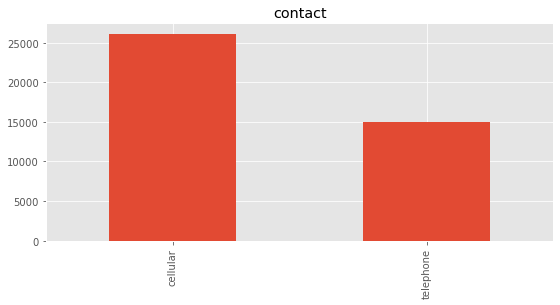

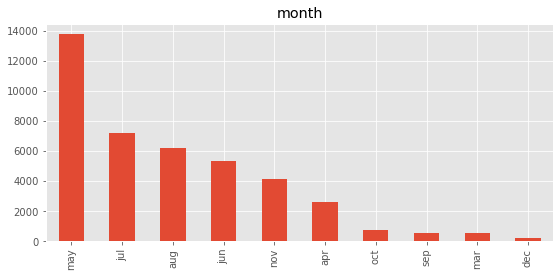

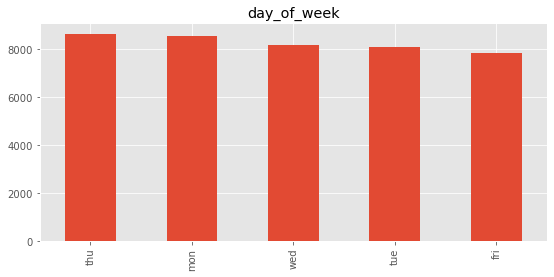

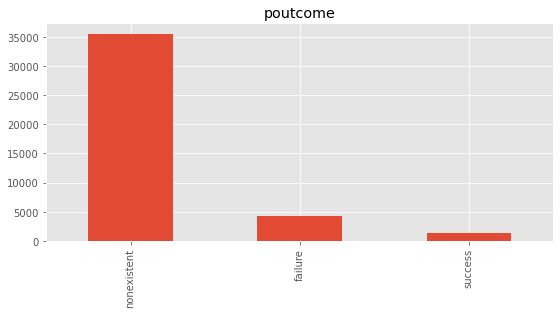

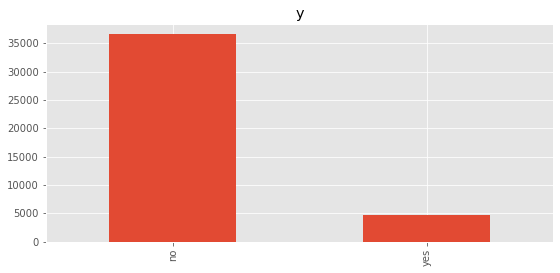

In [22]:
# Selecting the categorical columns
categorical_col = df.select_dtypes(include=['object']).columns
plt.style.use('ggplot')
# Plotting a bar chart for each of the cateorical variable
for i in categorical_col:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    df[i].value_counts().plot(kind='bar')
    plt.title(i)

Berdasarkan visualisasi di atas, maka dapat diketahui informasi bahwa:

- Nasabah yang memiliki pekerjaan admin merupakan mayoritas di antara mereka yang telah berlangganan
- Nasabah telah menikah
- Nasabah memegang gelar universitas
- Nasabah tidak memegang kredit secara default
- Ponsel harus menjadi mode kontak pilihan untuk menghubungi nasabah.

Mengubah tipe data object/string menjadi numerik

In [23]:
le = LabelEncoder()
categoric_encoded_job = le.fit_transform(df_category['job'])
categoric_encoded_marital = le.fit_transform(df_category['marital'])
categoric_encoded_education = le.fit_transform(df_category['education'])
categoric_encoded_default = le.fit_transform(df_category['default'])
categoric_encoded_housing = le.fit_transform(df_category['housing'])
categoric_encoded_loan = le.fit_transform(df_category['loan'])
categoric_encoded_contact = le.fit_transform(df_category['contact'])
categoric_encoded_month = le.fit_transform(df_category['month'])
categoric_encoded_day_of_week = le.fit_transform(df_category['day_of_week'])
categoric_encoded_poutcome = le.fit_transform(df_category['poutcome'])

In [24]:
list_encoded = [categoric_encoded_job, categoric_encoded_marital,
                  categoric_encoded_education, categoric_encoded_default,
                  categoric_encoded_housing, categoric_encoded_loan,
                  categoric_encoded_contact, categoric_encoded_month,
                  categoric_encoded_day_of_week, categoric_encoded_poutcome]

encoded_df = pd.DataFrame(data=list_encoded).T
cols_enc = df_category.columns
encoded_df.columns = cols_enc

In [25]:
encoded_df.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,3,1,0,0,0,0,1,6,1,1
1,7,1,3,1,0,0,1,6,1,1
2,7,1,3,0,2,0,1,6,1,1
3,0,1,1,0,0,0,1,6,1,1
4,7,1,3,0,0,2,1,6,1,1


In [26]:
df_labels = labels

In [27]:
encoded_df = pd.concat([encoded_df, df_labels], axis='columns')

In [28]:
df_train = pd.concat([df_numeric, encoded_df], axis='columns')

In [29]:
df_train

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,1,6,1,1,no
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,3,1,0,0,1,6,1,1,no
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,3,0,2,0,1,6,1,1,no
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,1,0,0,0,1,6,1,1,no
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,3,0,0,2,1,6,1,1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,5,0,2,0,0,7,0,1,yes
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,5,0,0,0,0,7,0,1,no
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,6,0,2,0,0,7,0,1,no
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,5,0,0,0,0,7,0,1,yes


In [30]:
lb = LabelBinarizer()
df_train['y'] = lb.fit_transform(df_train['y'])

In [31]:
df_train

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,1,6,1,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,3,1,0,0,1,6,1,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,3,0,2,0,1,6,1,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,1,0,0,0,1,6,1,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,3,0,0,2,1,6,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,5,0,2,0,0,7,0,1,1
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,5,0,0,0,0,7,0,1,0
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,6,0,2,0,0,7,0,1,0
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,5,0,0,0,0,7,0,1,1


# Data Preprocessing

Menggunakan standard scaler untuk membuat data mengikuti distribusi normal

In [32]:
standard_scaler = StandardScaler()
standard_scaler.fit(df_train)

X_scaled = standard_scaler.transform(df_train)

Membagi variabel prediktor dengan variabel kelas

In [33]:
X = df_train.iloc[:, :-1]
y = df_train.iloc[:, -1]

In [34]:
print('Ukuran dimensi X: {}'.format(X.shape))
print('Ukuran dimensi y: {}'.format(y.shape))

Ukuran dimensi X: (41188, 20)
Ukuran dimensi y: (41188,)


Membagi data training dan data test dengan test size = 20% dan train size - 80%

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pendefinisian Model

## 1. Model Logistic Regression

In [36]:
model_LogisticRegression = LogisticRegression(random_state=25)
model_LogisticRegression.fit(X_train, y_train)

LogisticRegression(random_state=25)

In [37]:
y_pred_lr = model_LogisticRegression.predict(X_test)
skor_logisticregression = accuracy_score(y_test, y_pred_lr)

In [38]:
cf_logisticregression = confusion_matrix(y_test, y_pred_lr)
cf_logisticregression

array([[7116,  187],
       [ 549,  386]], dtype=int64)

Melakukan visualisasi confusion matrix

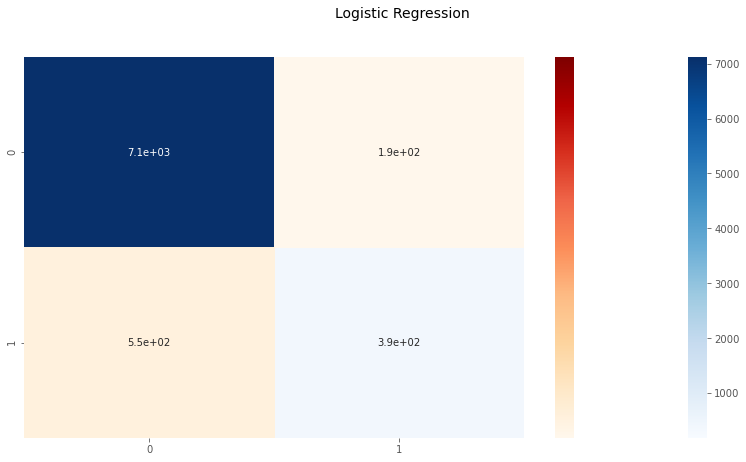

In [39]:
vmin = np.min(cf_logisticregression)
vmax = np.max(cf_logisticregression)
off_diag_mask = np.eye(*cf_logisticregression.shape, dtype=bool)

fig = plt.figure(figsize=(14,7))
plt.suptitle('Logistic Regression', fontsize=14)
sns.heatmap(cf_logisticregression, annot=True, mask=~off_diag_mask, cmap='Blues', vmin=vmin, vmax=vmax)
sns.heatmap(cf_logisticregression, annot=True, mask=off_diag_mask, cmap='OrRd', vmin=vmin, vmax=vmax, cbar_kws=dict(ticks=[]))

plt.show()

## 2. Model K-Nearest Neighbors

In [40]:
model_KNN = KNeighborsClassifier()
model_KNN.fit(X_train, y_train)

KNeighborsClassifier()

In [41]:
y_pred_knn = model_KNN.predict(X_test)
skor_knn = accuracy_score(y_test,y_pred_knn)

## 3. Model Support Vector Machine

In [42]:
model_svm = SVC(random_state=25)
model_svm.fit(X_train, y_train)

SVC(random_state=25)

In [43]:
y_pred_svm = model_svm.predict(X_test)
skor_svm = accuracy_score(y_test, y_pred_svm)

In [44]:
cf_svm = confusion_matrix(y_test, y_pred_svm)
cf_svm

array([[7176,  127],
       [ 742,  193]], dtype=int64)

Melakukan visualisasi confusion matrix

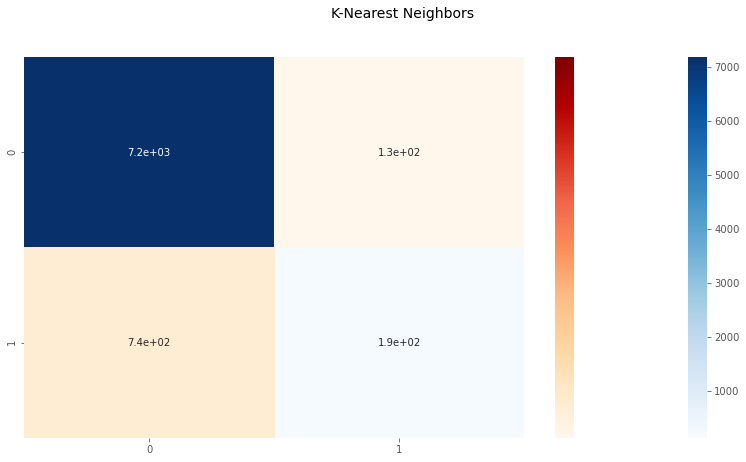

In [45]:
vmin = np.min(cf_svm)
vmax = np.max(cf_svm)
off_diag_mask = np.eye(*cf_svm.shape, dtype=bool)

fig = plt.figure(figsize=(14,7))
plt.suptitle('K-Nearest Neighbors', fontsize=14)
sns.heatmap(cf_svm, annot=True, mask=~off_diag_mask, cmap='Blues', vmin=vmin, vmax=vmax)
sns.heatmap(cf_svm, annot=True, mask=off_diag_mask, cmap='OrRd', vmin=vmin, vmax=vmax, cbar_kws=dict(ticks=[]))

plt.show()

## 4. Model Decision Tree

In [46]:
model_decisiontree = DecisionTreeClassifier(random_state=25)
model_decisiontree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=25)

In [47]:
y_pred_decisiontree = model_decisiontree.predict(X_test)
skor_decisiontree = accuracy_score(y_test, y_pred_decisiontree)

In [48]:
cf_decisiontree = confusion_matrix(y_test, y_pred_decisiontree)
cf_decisiontree

array([[6846,  457],
       [ 456,  479]], dtype=int64)

Melakukan visualisasi confusion matrix

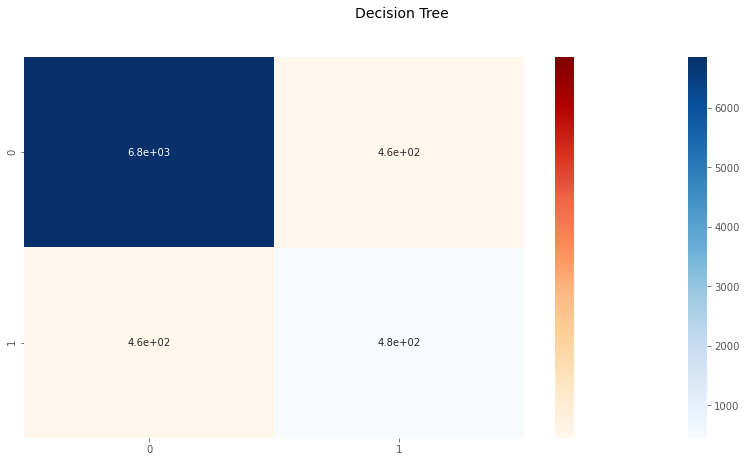

In [49]:
vmin = np.min(cf_decisiontree)
vmax = np.max(cf_decisiontree)
off_diag_mask = np.eye(*cf_decisiontree.shape, dtype=bool)

fig = plt.figure(figsize=(14,7))
plt.suptitle('Decision Tree', fontsize=14)
sns.heatmap(cf_decisiontree, annot=True, mask=~off_diag_mask, cmap='Blues', vmin=vmin, vmax=vmax)
sns.heatmap(cf_decisiontree, annot=True, mask=off_diag_mask, cmap='OrRd', vmin=vmin, vmax=vmax, cbar_kws=dict(ticks=[]))

plt.show()

## 5. Model Random Forest

In [50]:
model_randomforest = RandomForestClassifier(random_state=25)
model_randomforest.fit(X_train, y_train)

RandomForestClassifier(random_state=25)

In [51]:
y_pred_randomforest = model_randomforest.predict(X_test)
skor_randomforest = accuracy_score(y_test, y_pred_randomforest)

In [52]:
skor_decisiontree = accuracy_score(y_test, y_pred_decisiontree)

In [53]:
cf_randomforest = confusion_matrix(y_test, y_pred_decisiontree)
cf_randomforest

array([[6846,  457],
       [ 456,  479]], dtype=int64)

Melakukan visualisasi confusion matrix

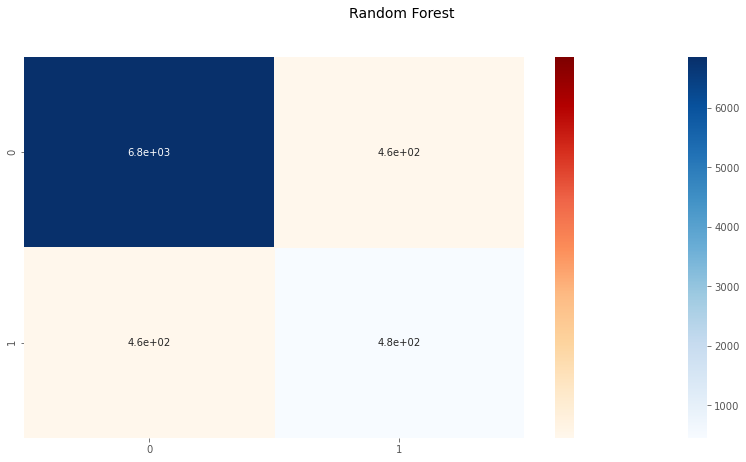

In [54]:
vmin = np.min(cf_randomforest)
vmax = np.max(cf_randomforest)
off_diag_mask = np.eye(*cf_randomforest.shape, dtype=bool)

fig = plt.figure(figsize=(14,7))
plt.suptitle('Random Forest', fontsize=14)
sns.heatmap(cf_randomforest, annot=True, mask=~off_diag_mask, cmap='Blues', vmin=vmin, vmax=vmax)
sns.heatmap(cf_randomforest, annot=True, mask=off_diag_mask, cmap='OrRd', vmin=vmin, vmax=vmax, cbar_kws=dict(ticks=[]))

plt.show()

## 6. Naive Bayes

In [55]:
model_naivebayes = GaussianNB()
model_naivebayes.fit(X_train, y_train)

GaussianNB()

In [56]:
y_pred_naivebayes = model_naivebayes.predict(X_test)
skor_naivebayes = accuracy_score(y_test, y_pred_naivebayes)

In [57]:
skor_randomforest = accuracy_score(y_test, y_pred_randomforest)

In [58]:
cf_naivebayes = confusion_matrix(y_test, y_pred_naivebayes)
cf_naivebayes

array([[6432,  871],
       [ 360,  575]], dtype=int64)

Melakukan visualisasi confusion matrix

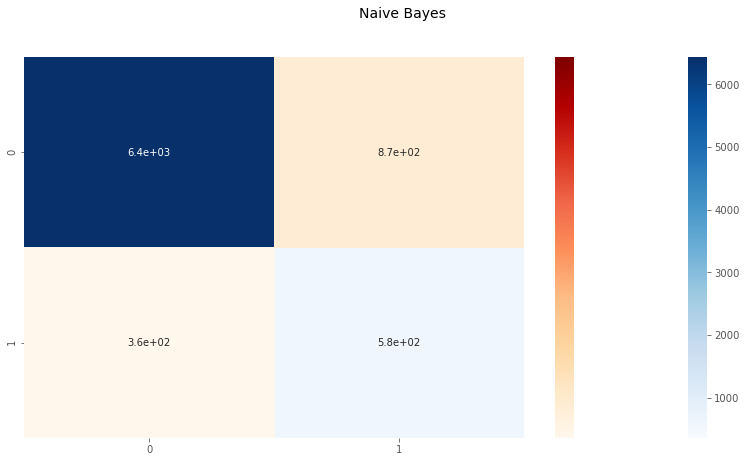

In [59]:
vmin = np.min(cf_naivebayes)
vmax = np.max(cf_naivebayes)
off_diag_mask = np.eye(*cf_naivebayes.shape, dtype=bool)

fig = plt.figure(figsize=(14,7))
plt.suptitle('Naive Bayes', fontsize=14)
sns.heatmap(cf_naivebayes, annot=True, mask=~off_diag_mask, cmap='Blues', vmin=vmin, vmax=vmax)
sns.heatmap(cf_naivebayes, annot=True, mask=off_diag_mask, cmap='OrRd', vmin=vmin, vmax=vmax, cbar_kws=dict(ticks=[]))

plt.show()

**Evaluasi keseluruhan model**

In [60]:
print('Akurasi model Logistic Regression:', skor_logisticregression)
print('Akurasi model K-Nearest Neighbors:', skor_knn)
print('Akurasi model Support Vector Machine:', skor_svm)
print('Akurasi model Decision Tree:', skor_decisiontree)
print('Akurasi model Random Forest:', skor_randomforest)
print('Akurasi model Naive Bayes:', skor_naivebayes)

Akurasi model Logistic Regression: 0.9106579266812334
Akurasi model K-Nearest Neighbors: 0.902282107307599
Akurasi model Support Vector Machine: 0.8945132313668366
Akurasi model Decision Tree: 0.8891721291575625
Akurasi model Random Forest: 0.9149065307113377
Akurasi model Naive Bayes: 0.8505705268268997


## Kesimpulan

Berdasarkan hasil uji akurasi, model Random forest memiliki akurasi yang paling tinggi yaitu 0.914, maka model tersebut dapat dijadikan model terbaik.